## Set up libraries and dataset

In [1]:
import pandas as pd
import numpy as np

# pca
from sklearn.decomposition import PCA, FactorAnalysis

# visualization
from matplotlib import pyplot as plt

# clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# debugging
from icecream import ic

In [2]:
# there are 4 type of balls:
# blue, represented by vector [1,0,0]
# red, represented by vector [0,1,0]
# green, represented by vector [0,0,1]
# black, represented by vector [0,0,0]

# create df1 consist of 150 balls of each type
df1 = pd.DataFrame(np.repeat(np.array([[1,0,0],[0,1,0],[0,0,1],[0,0,0]]),150,axis=0))
df1.columns = ['x','y','z']
# add a column to represent the type of each ball
df1['type'] = ['blue']*150 + ['red']*150 + ['green']*150 + ['black']*150

# create df2 consist of 150 balls of each type red, green, black, and 5 balls of blue
df2 = pd.DataFrame(np.repeat(np.array([[0,1,0],[0,0,1],[0,0,0]]),150,axis=0)) \
    .append(pd.DataFrame(np.repeat(np.array([[1,0,0]]),5,axis=0))) \
    .reset_index(drop=True)
df2.columns = ['x','y','z']
# add a column to represent the type of each ball
df2['type'] = ['red']*150 + ['green']*150 + ['black']*150 + ['blue']*5

C:\Users\baold2\AppData\Local\Temp\ipykernel_27104\4106288591.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = pd.DataFrame(np.repeat(np.array([[0,1,0],[0,0,1],[0,0,0]]),150,axis=0)) \


In [3]:
# slightly perturb the position of each ball in df1 and df2

# df1
df1['x'] = df1['x'] + np.random.normal(0,0.1,600)
df1['y'] = df1['y'] + np.random.normal(0,0.1,600)
df1['z'] = df1['z'] + np.random.normal(0,0.1,600)

# df2
df2['x'] = df2['x'] + np.random.normal(0,0.1,455)
df2['y'] = df2['y'] + np.random.normal(0,0.1,455)
df2['z'] = df2['z'] + np.random.normal(0,0.1,455)

## Generate PCA

In [4]:
pca = PCA(n_components=2)

# fit pca to df1
pca.fit(df1[['x','y','z']])
df1_pca = pd.DataFrame(pca.transform(df1[['x','y','z']]))
df1_pca['type'] = df1['type']

# fit pca to df2
pca.fit(df2[['x','y','z']])
df2_pca = pd.DataFrame(pca.transform(df2[['x','y','z']]))
df2_pca['type'] = df2['type']

## Plot PCA result

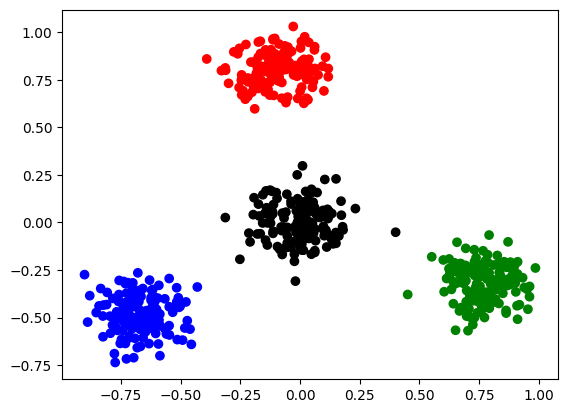

In [5]:
# plot df1_pca, with color to represent the type of ball
plt.scatter(df1_pca[0],df1_pca[1], c=df1_pca['type'])

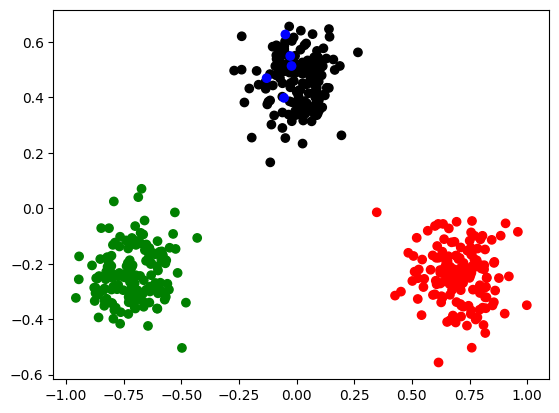

In [6]:
# plot df2_pca, with color to represent the type of ball
plt.scatter(df2_pca[0],df2_pca[1], c=df2_pca['type'])

## Clustering using full features - KMeans

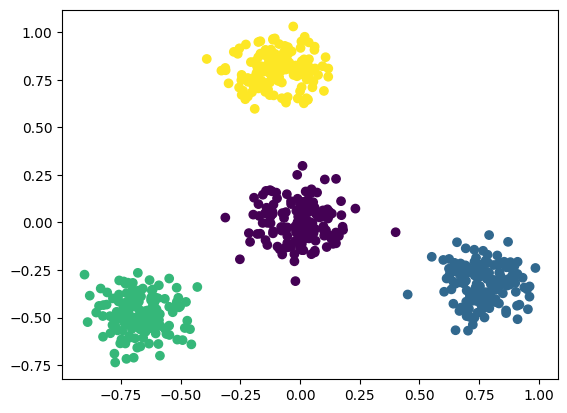

In [7]:
# Cluster df1

# fit kmeans to df1
kmeans = KMeans(n_clusters=4, random_state=0).fit(df1[['x','y','z']])
df1['cluster'] = kmeans.labels_
df1_pca['cluster'] = kmeans.labels_

# plot df1_pca, with color to represent the cluster
plt.scatter(df1_pca[0],df1_pca[1], c=df1_pca['cluster'])

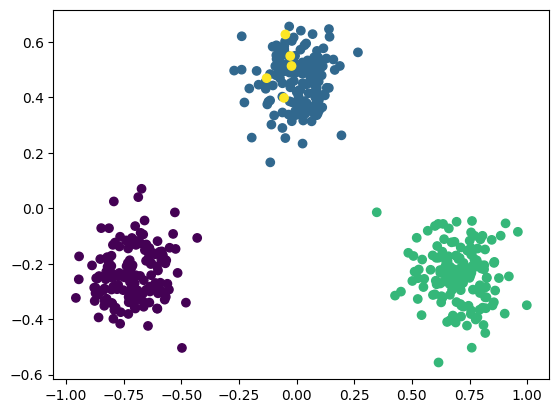

In [8]:
# Cluster df2

# fit kmeans to df2
kmeans = KMeans(n_clusters=4, random_state=0).fit(df2[['x','y','z']])
df2['cluster'] = kmeans.labels_
df2_pca['cluster'] = kmeans.labels_

# plot df2_pca, with color to represent the cluster
plt.scatter(df2_pca[0],df2_pca[1], c=df2_pca['cluster'])

In [9]:
## what if we use silhouette score to determine the number of clusters?

# fit kmeans to df1
best_no_cluster_df1 = 0
best_silhouette_score_ = 0
for no_cluster in range(2,10):
    kmeans = KMeans(n_clusters=no_cluster, random_state=0).fit(df1[['x','y','z']])
    df1['cluster'] = kmeans.labels_
    df1_pca['cluster'] = kmeans.labels_
    silhouette_score_ = silhouette_score(df1[['x','y','z']], df1['cluster'])
    ic(no_cluster, silhouette_score_)

    if silhouette_score_ > best_silhouette_score_:
        best_silhouette_score_ = silhouette_score_
        best_no_cluster_df1 = no_cluster

ic(best_no_cluster_df1)

# fit kmeans to df2
best_no_cluster_df2 = 0
best_silhouette_score_ = 0
for no_cluster in range(2,10):
    kmeans = KMeans(n_clusters=no_cluster, random_state=0).fit(df2[['x','y','z']])
    df2['cluster'] = kmeans.labels_
    df2_pca['cluster'] = kmeans.labels_
    silhouette_score_ = silhouette_score(df2[['x','y','z']], df2['cluster'])
    ic(no_cluster, silhouette_score_)

    if silhouette_score_ > best_silhouette_score_:
        best_silhouette_score_ = silhouette_score_
        best_no_cluster_df2 = no_cluster

ic(best_no_cluster_df2)

ic| no_cluster: 2, silhouette_score_: 0.46467764842214215
ic| no_cluster: 3, silhouette_score_: 0.6355357930575614
ic| no_cluster: 4, silhouette_score_: 0.7722356427559095
ic| no_cluster: 5, silhouette_score_: 0.6416187765705934
ic| no_cluster: 6, silhouette_score_: 0.5013685564580516
ic| no_cluster: 7, silhouette_score_: 0.37511586036693756
ic| no_cluster: 8, silhouette_score_: 0.24131690311906104
ic| no_cluster: 9, silhouette_score_: 0.23919176798968048
ic| best_no_cluster_df1: 4
ic| no_cluster: 2, silhouette_score_: 0.5793454576973223
ic| no_cluster: 3, silhouette_score_: 0.7598837152804375
ic| no_cluster: 4, silhouette_score_: 0.7693929915628261
ic| no_cluster: 5, silhouette_score_: 0.5903056979154099
ic| no_cluster: 6, silhouette_score_: 0.414645909024456
ic| no_cluster: 7, silhouette_score_: 0.24231256132664736
ic| no_cluster: 8, silhouette_score_: 0.2503254344861886
ic| no_cluster: 9, silhouette_score_: 0.24721638101083254
ic| best_no_cluster_df2: 4


4

Since the best_no_cluster_df1 and best_no_cluster_df2 is 4, which we already experimented, no more experiment needed

## Generate FA

In [10]:
factor = FactorAnalysis(n_components=2, random_state=0)

# fit factor analysis to df1
factor.fit(df1[['x','y','z']])
df1_factor = pd.DataFrame(factor.transform(df1[['x','y','z']]))
df1_factor['type'] = df1['type']

# fit factor analysis to df2
factor.fit(df2[['x','y','z']])
df2_factor = pd.DataFrame(factor.transform(df2[['x','y','z']]))
df2_factor['type'] = df2['type']

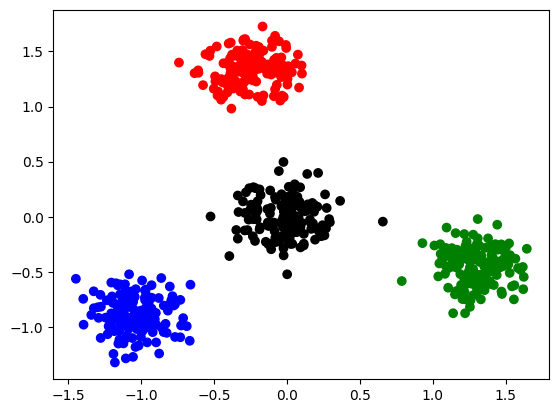

In [11]:
# plot df1_factor, with color to represent the type of ball
plt.scatter(df1_factor[0],df1_factor[1], c=df1_factor['type'])

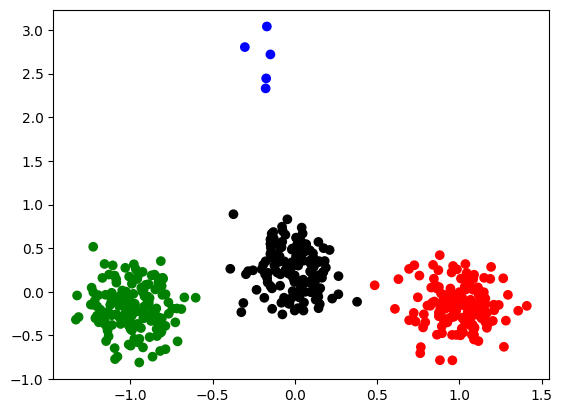

In [12]:
# plot df2_factor, with color to represent the type of ball
plt.scatter(df2_factor[0],df2_factor[1], c=df2_factor['type'])